## Explore Labquake Regions of Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from functools import reduce
from tqdm import tqdm_notebook
from sklearn.metrics import mean_absolute_error
from IPython.display import display
import gen_features
from multiprocessing import Process, Value
%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set_style('whitegrid')

In [24]:
# Read specified chunks of training data

segment_size = 150000
read_chunks = list(range(1,141))
folder = "temp"
filename = "text.txt"
quake_num = Value('i',0)
quake_local = 0

for k in tqdm_notebook(read_chunks):
    p = Process(target=gen_features.quake_sample,args=(k,quake_num))
    p.start()
    p.join()
    if quake_num.value != quake_local:
        with open(os.path.join(folder,filename),'r') as file:
            print(file.read())
    quake_local = quake_num.value

Ppid: 9592
Pid: 12140
k = 2
quake_num = 1
Memory use = 71.4%

Ppid: 9592
Pid: 8632
k = 12
quake_num = 2
Memory use = 71.3%

Ppid: 9592
Pid: 1940
k = 24
quake_num = 3
Memory use = 70.8%

Ppid: 9592
Pid: 11324
k = 31
quake_num = 4
Memory use = 70.8%

Ppid: 9592
Pid: 3644
k = 42
quake_num = 5
Memory use = 70.8%

Ppid: 9592
Pid: 14088
k = 49
quake_num = 6
Memory use = 70.7%

Ppid: 9592
Pid: 9516
k = 55
quake_num = 7
Memory use = 71.2%

Ppid: 9592
Pid: 4980
k = 69
quake_num = 8
Memory use = 71.5%

Ppid: 9592
Pid: 15220
k = 76
quake_num = 9
Memory use = 71.4%

Ppid: 9592
Pid: 11344
k = 84
quake_num = 10
Memory use = 71.3%

Ppid: 9592
Pid: 12676
k = 94
quake_num = 11
Memory use = 70.8%

Ppid: 9592
Pid: 10764
k = 103
quake_num = 12
Memory use = 71.0%

Ppid: 9592
Pid: 9752
k = 111
quake_num = 13
Memory use = 71.4%

Ppid: 9592
Pid: 14660
k = 118
quake_num = 14
Memory use = 71.2%

Ppid: 9592
Pid: 9620
k = 131
quake_num = 15
Memory use = 70.8%

Ppid: 9592
Pid: 780
k = 139
quake_num = 16
Memory use

In [5]:
quake_local = 16
quake_data = [pd.read_csv(os.path.join("temp","quake{}.csv".format(k)),index_col=0,usecols=[1,2,3])
              for k in range(quake_local)]

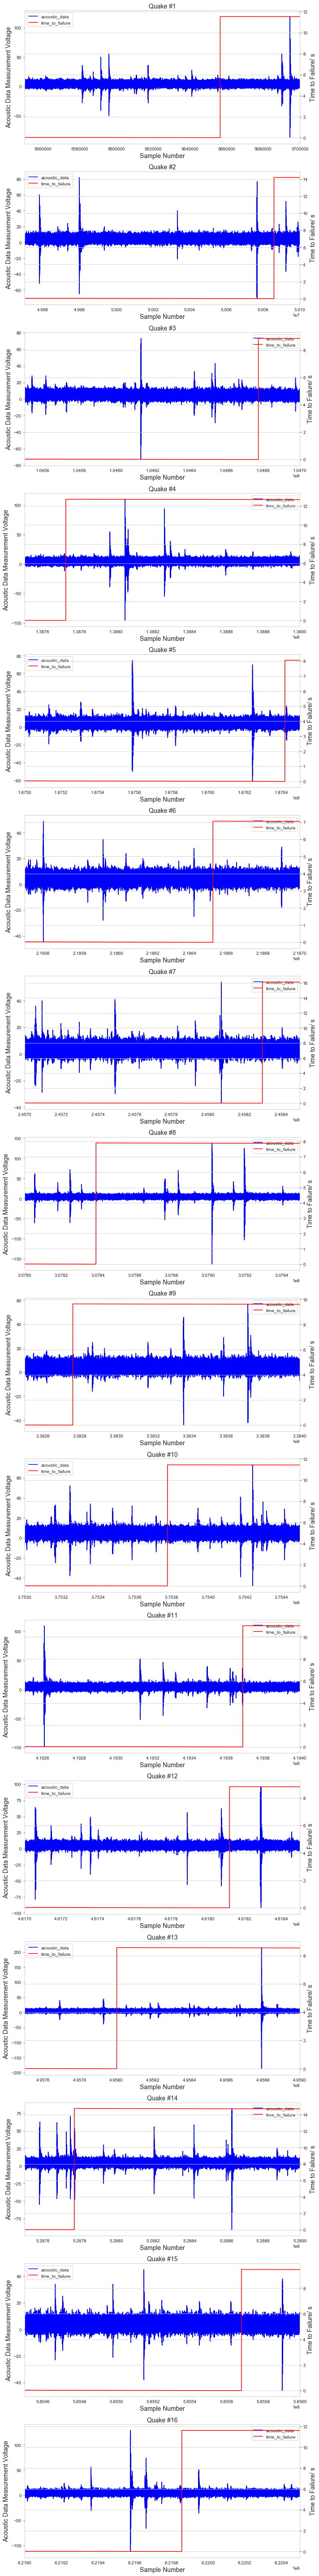

In [17]:
num = quake_local
fig,axes = plt.subplots(num,1,figsize = (10,5*num))
for i,quake,axis in zip(range(num),quake_data,axes):
    ln1 = axis.plot(quake['acoustic_data'],'b',label='acoustic_data')
    axis2 = axis.twinx()
    ln2 = axis2.plot(quake['time_to_failure'],'r',label='time_to_failure')
    axis.legend(ln1+ln2,quake.columns.values)
    axis.grid(which='both')
    axis.set_title(r'Quake #{}'.format(i+1),fontsize=14)
    axis.set_ylabel('Acoustic Data Measurement Voltage',fontsize=14)
    axis2.set_ylabel(r'Time to Failure/ s',fontsize=14)
    # ax2.set_ylim((0,12))
    axis.set_xlim((quake.index[0],quake.index[-1]))
    axis.set_xlabel(r'Sample Number'.format(quake.index[-1]),fontsize=14)
plt.tight_layout()
plt.savefig("Labquakes")